# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
df = pd.DataFrame(columns = ['city', 'latitude', 'lon', 'temp', 'humidity', 'visibility','cloudiness', 'speed']) 
  
# append rows to an empty DataFrame 
    
index = 0

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    
    print(index, city)
    index = index + 1
    
    data = requests.get(url).json()
   
    try:
        latitude = data["coord"]["lat"]
        lon = data["coord"]["lon"]
        temp = data["main"]["temp"]
        humidity = data["main"]["humidity"]
        cloudiness = data["clouds"]["all"]
        visibility = data["visibility"]
        wind_speed =data["wind"]["speed"]
            
    except KeyError:
        print("Oops, that key doesn't exist.")
    
   
    df = df.append({'city':city, 'lat': latitude,'lon':lon, 'temp':temp, 'humidity':humidity, 'cloudiness':cloudiness, 'speed':wind_speed, 'visibility':visibility},  
                ignore_index = True) 

print(df) 

0 changji
1 bluff
2 hermanus
3 punta arenas
4 marzuq
5 constitucion
6 taoudenni
7 mar del plata
8 albany
9 barrow
10 uzumlu
Oops, that key doesn't exist.
11 hithadhoo
12 taolanaro
Oops, that key doesn't exist.
13 khatanga
14 ushuaia
15 burgersdorp
16 nikolskoye
17 tsihombe
Oops, that key doesn't exist.
18 georgetown
19 chokurdakh
20 rio grande
21 kamaishi
22 acapulco
23 jamestown
24 airai
25 atuona
26 puerto maldonado
27 severo-kurilsk
28 arraial do cabo
29 tessalit
30 butaritari
31 bur gabo
Oops, that key doesn't exist.
32 hobart
33 ust-kuyga
34 paka
35 ciales
36 san cristobal
37 hasaki
38 kedrovyy
39 faanui
40 port alfred
41 dukat
42 shaunavon
43 new norfolk
44 punta alta
45 perry hall
46 naze
47 namibe
48 manado
49 bose
50 general roca
51 vaini
52 lavrentiya
53 krasnoselkup
54 cabedelo
55 hoi an
56 ribeira grande
57 mitsamiouli
58 vallenar
59 bathsheba
60 micheweni
61 adrar
62 sitka
63 busselton
64 harper
65 sao filipe
66 biak
67 tual
68 tasiilaq
69 chagda
Oops, that key doesn't exi

522 puerto colombia
523 hounde
524 lapua
525 odienne
526 motala
527 bilma
528 apatou
529 montlucon
530 filingue
531 iwanai
532 talnakh
533 gao
534 powell
535 nizwa
536 carlsbad
537 innisfail
538 bardiyah
539 baykit
540 lagoa
541 faya
542 banmo
Oops, that key doesn't exist.
543 aksu
544 anadyr
545 matay
546 lazarev
547 cascais
548 mananjary
549 la ronge
550 komsomolets
551 kang
552 dali
553 dongsheng
554 bubaque
555 frederikshavn
556 yulara
557 omboue
558 trincomalee
559 waipawa
560 vila franca do campo
561 liverpool
562 jaguaruana
563 vostok
564 loukhi
565 bidar
566 grand-santi
567 flin flon
568 pirovskoye
569 sawakin
570 sabha
571 kiruna
572 henzada
Oops, that key doesn't exist.
573 ashtabula
574 ingham
575 phan rang
Oops, that key doesn't exist.
576 gat
577 camacha
578 tamandare
579 toppenish
580 conceicao da barra
581 araguacu
582 pangai
583 bolungarvik
Oops, that key doesn't exist.
584 khash
585 hirara
586 zorritos
587 worthington
588 maningrida
589 shache
590 arlit
591 huazolotitl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
citydata = "data/cities.csv" 
df.to_csv(citydata)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
bad_rows = df.query("humidity > 100")

bad_rows

,city,latitude,lon,temp,humidity,visibility,cloudiness,speed,lat


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:


# Set the upper and lower limits of our y axis
# plt.ylim(0,120)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

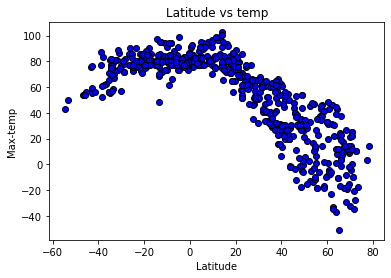

In [13]:
plt.scatter(df['lat'],df['temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs temp")
plt.xlabel("Latitude")
plt.ylabel("Max-temp")
plt.savefig("location1.png", format="png")

## Latitude vs. Humidity Plot

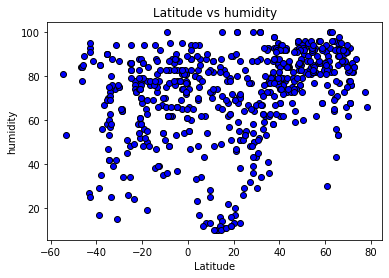

In [14]:
plt.scatter(df['lat'],df['humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.savefig("location2.png", format="png")

## Latitude vs. Cloudiness Plot

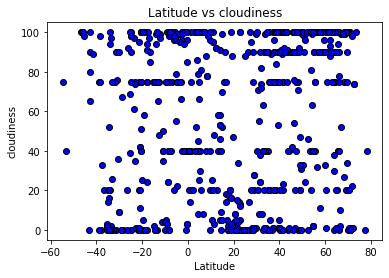

In [15]:
plt.scatter(df['lat'],df['cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.savefig("location3.png", format="png")

## Latitude vs. Wind Speed Plot

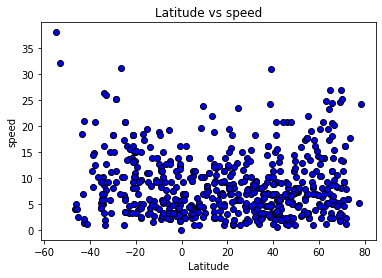

In [16]:
plt.scatter(df['lat'],df['speed'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs speed")
plt.xlabel("Latitude")
plt.ylabel("speed")
plt.savefig("location4.png", format="png")

## Linear Regression

In [17]:
Northern_data = df.query("lat >= 0")
southern_data = df.query("lat < 0")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

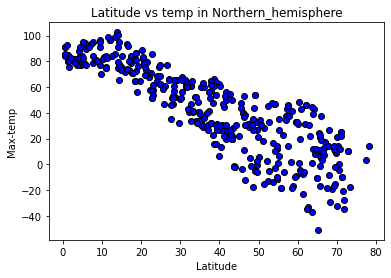

In [18]:
plt.scatter(Northern_data['lat'],Northern_data['temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs temp in Northern_hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max-temp")
plt.savefig("location5.png", format="png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

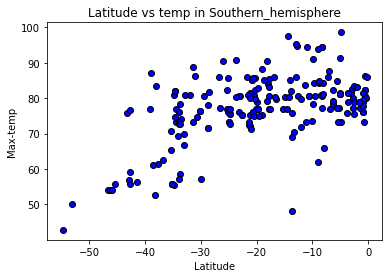

In [19]:
plt.scatter(southern_data['lat'],southern_data['temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs temp in Southern_hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max-temp")
plt.savefig("location6.png", format="png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

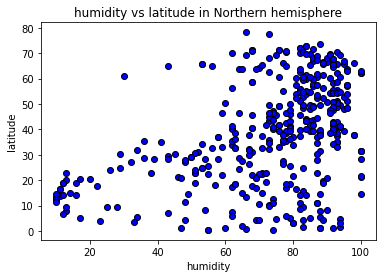

In [20]:
plt.scatter(Northern_data['humidity'],Northern_data['lat'], marker="o", facecolors="blue", edgecolors="black")
plt.title("humidity vs latitude in Northern hemisphere")
plt.xlabel("humidity")
plt.ylabel("latitude")
plt.savefig("location7.png", format="png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

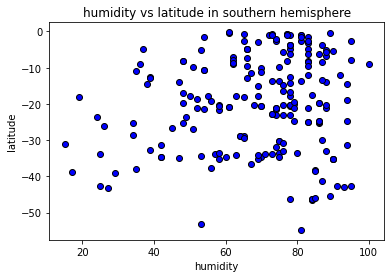

In [21]:
plt.scatter(southern_data['humidity'],southern_data['lat'], marker="o", facecolors="blue", edgecolors="black")
plt.title("humidity vs latitude in southern hemisphere")
plt.xlabel("humidity")
plt.ylabel("latitude")
plt.savefig("location8.png", format="png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

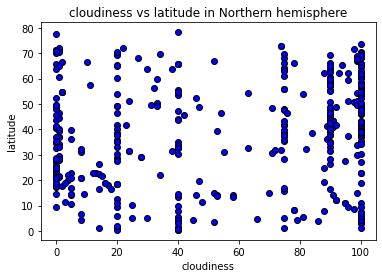

In [22]:
plt.scatter(Northern_data['cloudiness'],Northern_data['lat'], marker="o", facecolors="blue", edgecolors="black")
plt.title("cloudiness vs latitude in Northern hemisphere")
plt.xlabel("cloudiness")
plt.ylabel("latitude")
plt.savefig("location9.png", format="png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

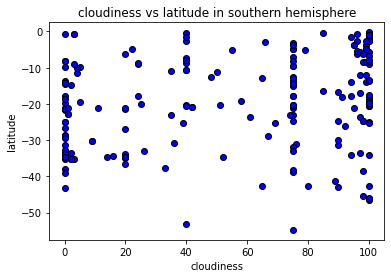

In [23]:
plt.scatter(southern_data['cloudiness'],southern_data['lat'], marker="o", facecolors="blue", edgecolors="black")
plt.title("cloudiness vs latitude in southern hemisphere")
plt.xlabel("cloudiness")
plt.ylabel("latitude")
plt.savefig("location10.png", format="png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

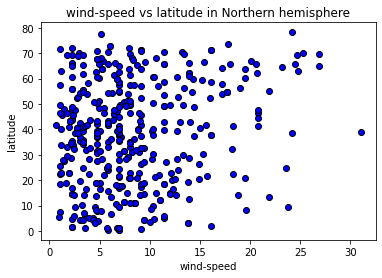

In [24]:
plt.scatter(Northern_data['speed'],Northern_data['lat'], marker="o", facecolors="blue", edgecolors="black")
plt.title("wind-speed vs latitude in Northern hemisphere")
plt.xlabel("wind-speed")
plt.ylabel("latitude")
plt.savefig("location11.png", format="png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

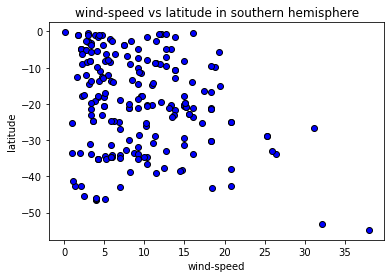

In [25]:
plt.scatter(southern_data['speed'],southern_data['lat'], marker="o", facecolors="blue", edgecolors="black")
plt.title("wind-speed vs latitude in southern hemisphere")
plt.xlabel("wind-speed")
plt.ylabel("latitude")
plt.savefig("location12.png", format="png")